In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# dataset
train_x = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1], [5.2], [5.0], 
                    [0.1], [1.0], [2.0], [3.0], [1.9], [1.5], [1.2],
                    [10.1], [20.5], [12.5], [15.2], [17.3]], dtype=np.float32)

train_y = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3], [2.6], [2.55], 
                    [0.055], [0.49], [1.03], [1.59], [1.0], [0.81], [0.58],
                    [5.6], [10.25], [6.9], [7.8], [9.1]], dtype=np.float32)

In [59]:
class LinearRegression(torch.nn.Module):
    def __init__(self, in_features, learning_rate=0.01, epoch=1, l1_weight=0, l2_weight=0):
        super(LinearRegression, self).__init__()
        self.model = nn.Linear(in_features, 1)
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.l1_weight = l1_weight
        self.l2_weight = l2_weight
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)
    
    def train(self, batch_x, batch_y, model_name='linear_regression.model', output_log_freq=0):
        """
        batch_x - Tensor of input training samples with type torch.Tensor.
        batch_y - Tensor of input training labels with type torch.Tensor.
        output_log_freq - The frequency of printing the progress.
        """
        for e in range(self.epoch):
            # Forward pass
            output = self.model(batch_x)
            # Calculate loss
            params = torch.cat([x.view(-1) for x in self.model.parameters()])
            l1_loss = 0 if self.l1_weight == 0 else torch.norm(params, 1)
            l2_loss = 0 if self.l2_weight == 0 else torch.norm(params, 2)
            loss = self.criterion(output, batch_y) + self.l1_weight * l1_loss + self.l2_weight * l2_loss
            # Update weights
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            if output_log_freq and (e + 1) % output_log_freq == 0:
                print('Epoch %d/%d, MSE loss: %.5f' % (e + 1, self.epoch, loss.item()))
        if model_name:
            torch.save(self.model.state_dict(), model_name)
    
    def predict(self, batch_x):
        """
        Predict the output with given features.
        batch_x - Input training samples with type Tensor.
        """
        return self.model(batch_x).detach().numpy()

Epoch 100/1000, MSE loss: 0.50383
Epoch 200/1000, MSE loss: 0.47024
Epoch 300/1000, MSE loss: 0.46247
Epoch 400/1000, MSE loss: 0.46068
Epoch 500/1000, MSE loss: 0.46026
Epoch 600/1000, MSE loss: 0.46017
Epoch 700/1000, MSE loss: 0.46015
Epoch 800/1000, MSE loss: 0.46014
Epoch 900/1000, MSE loss: 0.46014
Epoch 1000/1000, MSE loss: 0.46014


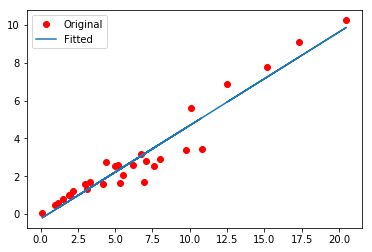

In [60]:
# Prepare the data
batch_x = torch.from_numpy(train_x)
batch_y = torch.from_numpy(train_y)
# Initiate the model
lr = LinearRegression(in_features=1, learning_rate=0.01, epoch=1000, l1_weight=0.001, l2_weight=0.001)
lr.train(batch_x, batch_y, output_log_freq=100)
# Plot the graph
predicted = lr.predict(batch_x)
plt.plot(train_x, train_y, 'ro', label='Original')
plt.plot(train_x, predicted, label='Fitted')
plt.legend()
plt.show()